In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

columns = ['contbr_nm', 'contbr_zip', 'contbr_st', 'contb_receipt_amt']
fec_trump = pd.read_csv('P80001571-ALL.csv', index_col=False, usecols=columns, dtype={'contbr_zip': np.string_})
fec_clinton = pd.read_csv('P00003392-ALL.csv', index_col=False, usecols=columns, dtype={'contbr_zip': np.string_})
fec_trump = fec_trump[fec_trump.contb_receipt_amt > 0].drop_duplicates(['contbr_nm', 'contbr_zip'])[columns[:3]]
fec_clinton = fec_clinton[fec_clinton.contb_receipt_amt > 0].drop_duplicates(['contbr_nm', 'contbr_zip'])[columns[:3]]

In [21]:
fec = pd.merge(fec_trump, fec_clinton, how='outer', on=['contbr_nm', 'contbr_zip'])
fec[:5]

,contbr_nm,contbr_zip,contbr_st_x,contbr_st_y
0,"BLAKESLEE, TODD",99999,AA,NaN
1,"MARTINEZ, JOVANNI",34004,AA,NaN
2,"VANBEUGE, ROBERT",34022,AA,NaN
3,"ECKERSALL, LAWRENCE",34004,AA,NaN
4,"KEEGAN, REX",09470,AE,NaN


In [22]:
fec[fec.contbr_st_x.notnull() & fec.contbr_st_y.notnull() & (fec.contbr_st_x != fec.contbr_st_y)]  # should be empty

,contbr_nm,contbr_zip,contbr_st_x,contbr_st_y


In [23]:
states, counts = np.unique(np.where(fec.contbr_st_x.notnull(), fec.contbr_st_x, fec.contbr_st_y), return_counts=True)
state_counts = Series(counts, index=states)
state_counts[:5]

AA       49
AB       15
AE      172
AK     2457
AL    12890
dtype: int64

In [26]:
trump = fec.contbr_st_x.value_counts() / state_counts
clinton = fec.contbr_st_y.value_counts() / state_counts
trump[:10]

AA    0.081633
AB         NaN
AE    0.127907
AK    0.568580
AL    0.778510
AP    0.152174
AR    0.636921
AS    0.500000
AZ    0.666264
BA         NaN
dtype: float64

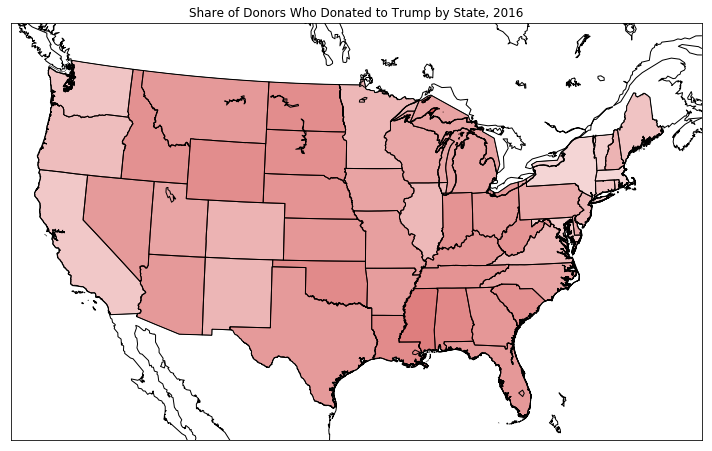

In [29]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # left, bottom, width, height (in % of figure width/height)
lllat = 23; urlat = 51; lllon = -125; urlon = -62
m = Basemap(ax=ax, projection='stere', lon_0=(lllon+urlon)/2, lat_0=(lllat+urlon)/2,
            llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=urlon, resolution='l')
m.drawcoastlines(); m.drawcountries()
m.readshapefile('statesp010g\\statesp010g', 'states', drawbounds=False)
for info, coords in zip(m.states_info, m.states):
    poly = plt.Polygon(coords, fc=[0.8, 0.2, 0.2, 0.75 * trump[info['STATE_ABBR']]], ec='k')
    ax.add_patch(poly)
plt.title('Share of Donors Who Donated to Trump by State, 2016')
plt.show()

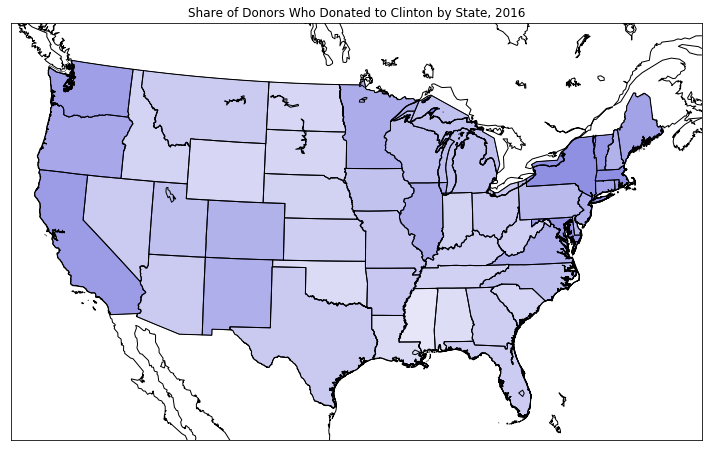

In [30]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # left, bottom, width, height (in % of figure width/height)
m = Basemap(ax=ax, projection='stere', lon_0=(lllon+urlon)/2, lat_0=(lllat+urlon)/2,
            llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=urlon, resolution='l')
m.drawcoastlines(); m.drawcountries()
m.readshapefile('statesp010g\\statesp010g', 'states', drawbounds=False)
for info, coords in zip(m.states_info, m.states):
    poly = plt.Polygon(coords, fc=[0.2, 0.2, 0.8, 0.75 * clinton[info['STATE_ABBR']]], ec='k')
    ax.add_patch(poly)
plt.title('Share of Donors Who Donated to Clinton by State, 2016')
plt.show()

In [34]:
print(len(fec[fec.contbr_st_x.notnull() & fec.contbr_st_y.notnull()]))  # sufficiently small that we can remove them
clinton_p = fec[fec.contbr_st_x.isnull() | fec.contbr_st_y.isnull()].contbr_st_y.value_counts() / state_counts

17


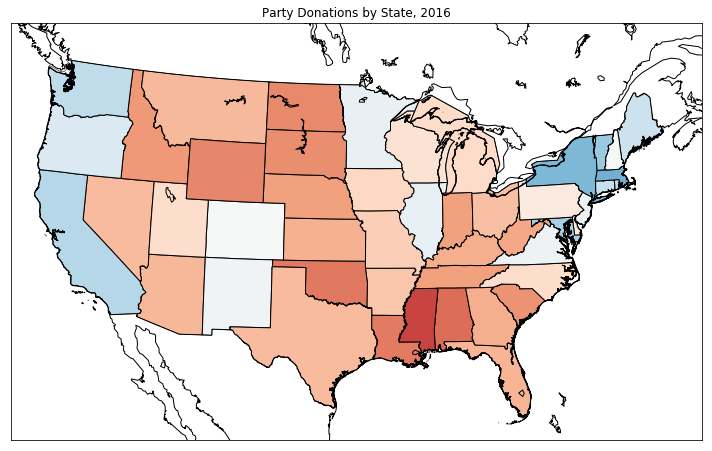

In [35]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # left, bottom, width, height (in % of figure width/height)
m = Basemap(ax=ax, projection='stere', lon_0=(lllon+urlon)/2, lat_0=(lllat+urlon)/2,
            llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=urlon, resolution='l')
m.drawcoastlines(); m.drawcountries()
m.readshapefile('statesp010g\\statesp010g', 'states', drawbounds=False)
for info, coords in zip(m.states_info, m.states):
    poly = plt.Polygon(coords, fc=plt.cm.RdBu(clinton[info['STATE_ABBR']]), ec='k')
    ax.add_patch(poly)
plt.title('Party Donations by State, 2016')
plt.show()